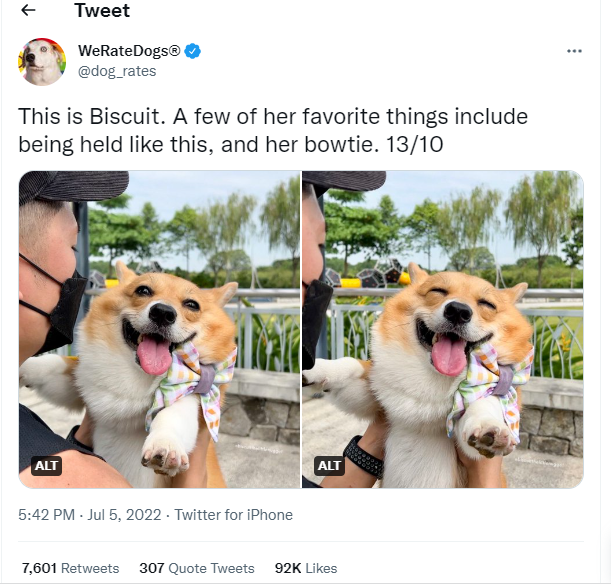
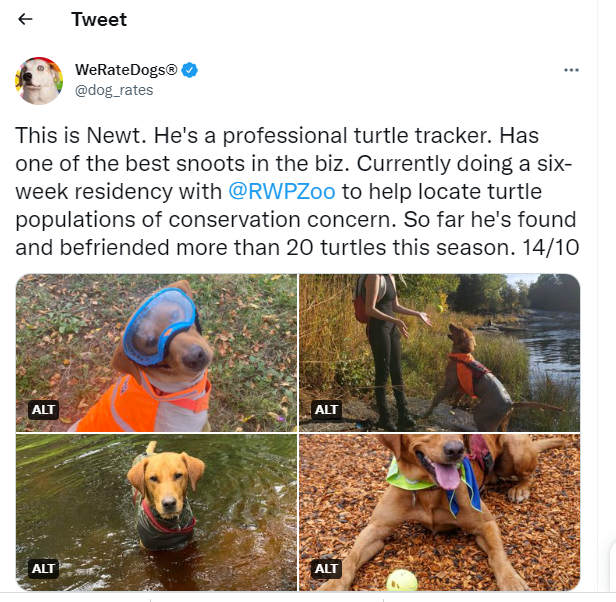

# Insights

The favorite count, retweet count and tweet_IDs gave us more insight that there are tweets that have more favorite counts and retweet counts than other tweet_IDs regardless if the dog stage posted with the various tweets are the same.like in our vizzes of favorite column and retweet counts compared with tweet_IDs, observe that the highest liked(favorite) dog stage,puppo had a different tweet_ID and was not the highest_retweeted dog_stage; instead it was the tweet_ID 744234799360020481 with dog stage,doggo that had the most retweet count and also the second highest favorite count.

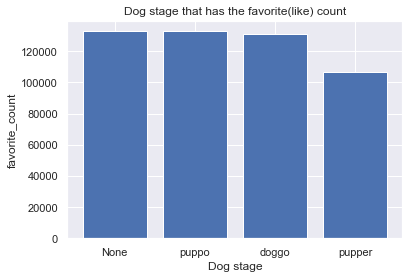
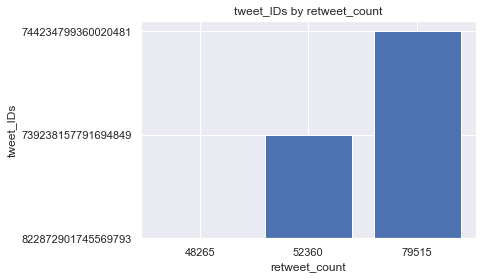



As mentioned in the wrangle_act.ipynb file,Tweet source provides information about the Tweet and its author.Hence why we needed to know where most tweets on the weratedogs twitter archive come from. It helps understand how a tweet was posted.Twitter for iphone is really a source where most authors posted from,liked and retweeted from. Safe to say our Users are majorly IPHONE users.

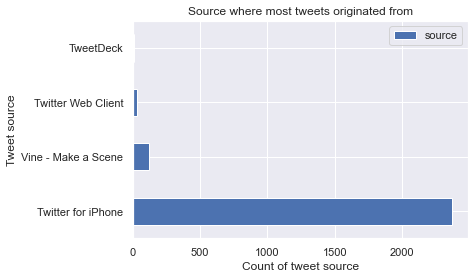

From the first 3 consecutive visualization, The Three charts displayed in quick succession shows that Labrador retriever is one of the most commonly occurring dog breed based on this Twitter data followed closely by Golden retriever. As seen also in the mean of 66% on the First prediction,down to 14% on the Second prediction for the Labrador retriever dog breed compared to the mean of 72% on the First prediction,down to 11% on the Second prediction for the Golden_retriever.So close!!!
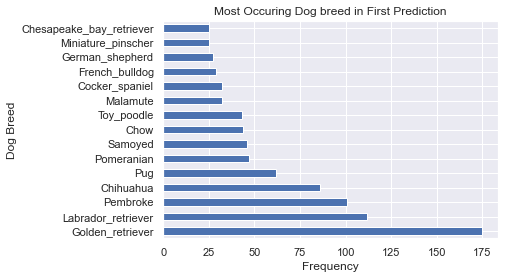
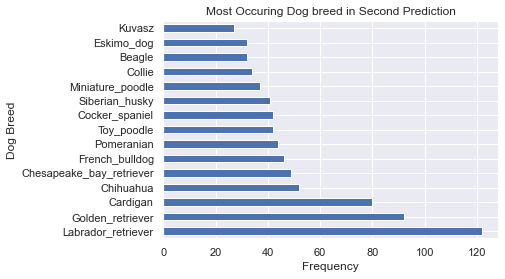
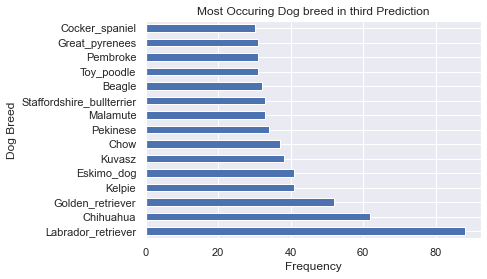

# TO DERIVE THOSE INSIGHTS AND VIZ. ABOVE, THE CODES BELOW WERE DEVELOPED AND RAN WITHOUT ERRORS 

# Gathering Dataset

In [145]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

we_rate_dogs = pd.read_csv('twitter-archive-enhanced.csv')

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [146]:
tweet_ids = we_rate_dogs.tweet_id.values
len(tweet_ids)

2356

In [ ]:

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.HTTPException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [149]:
# Reading Json objects from txt file into pandas as a Dictionary
with open('tweet-json.txt','r') as fb:
    frame = []
    for line in fb:
        frame.append(json.loads(line))
    

In [ ]:
frame[0]

In [61]:
#append to list of dictionaries
df_list = []

for each_line in frame:
    tweet_ID = each_line['id']
    retweet_count = each_line['retweet_count']
    favorite_count = each_line['favorite_count']
    
    df_list.append({'tweet_ID': tweet_ID,
                   'retweet_count': retweet_count,
                   'favorite_count': favorite_count})

In [151]:
#then finally creating a DataFrame called df by converting df_list using the pd.DataFrame constructor
df = pd.DataFrame(df_list, columns =['tweet_ID','retweet_count','favorite_count'])
df = df.reset_index(drop = True)
df

,tweet_ID,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


# Assessing the Dataset

In [152]:
we_rate_dogs

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [ ]:
list(we_rate_dogs.source)

In [154]:
we_rate_dogs.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [66]:
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [155]:
we_rate_dogs.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [68]:
we_rate_dogs[we_rate_dogs.rating_numerator == 1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [ ]:
list(we_rate_dogs['name'].str.islower())

In [158]:
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

In [159]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [72]:
image_predictions.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [160]:
df

,tweet_ID,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [161]:
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [162]:
we_rate_dogs[we_rate_dogs['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [163]:
we_rate_dogs.duplicated().sum()

0

In [164]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_ID        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [165]:
all_columns = pd.Series(list(we_rate_dogs) + list(image_predictions) + list(df))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

### Quality

*  tweet_id column name not consistent for the other tables
*  all (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns) rows have values in the
   dataframe but we dont want retweet info based on the fact that most users retweet their own tweets.
*  name column in the we_rate_dogs table have some unusual names as a,not,one,his etc,and this non-dog
   names all comes in small letters. also name as column title not descriptive enough.
*  Erroneous datatypes (timestamp, retweeted_status_timestamp columns)
*  retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id,in_reply_to_user_id,retweeted_status_timestamp
   columns are not needed in this analysis for data integrity, esp with Validity data conerns with float datatype
*  source column has some irrelevant words attached to the main source type
*  header/column names for p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog are not descriptive enough
*  p1,p2,p3 columns begin with small letters sometimes, capital letters other times

### Tidiness

* df table and image_predictions table should be part of we_rate_dogs table
* Four columns containing one variable-dog stages

# Cleaning the Dataset

In [166]:
we_rate_dogs_clean = we_rate_dogs.copy()
image_predictions_clean = image_predictions.copy()
df_clean = df.copy()

For safety reasons, lets first of all tackle the first problem in 
our we_rate_dogs table in the Quality part before we move to Tidiness Assessment
and then back to Quality Assessment

### Rename tweet_id column 

### *Define*

Rename the tweet_id column to tweet_ID column with pandas rename method 
so we can have a common column for easy joining of tables later while cleaning

### *Code*

In [167]:
# renaming for the three tables
we_rate_dogs_clean = we_rate_dogs_clean.rename(columns = {'tweet_id' : 'tweet_ID'})
image_predictions_clean = image_predictions_clean.rename(columns = {'tweet_id' : 'tweet_ID'})
                          

### *Test*

In [168]:
we_rate_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_ID                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [83]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_ID  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [169]:
all_columns = pd.Series(list(we_rate_dogs_clean) + list(image_predictions_clean)+ list(df_clean))
all_columns[all_columns.duplicated()]

17    tweet_ID
29    tweet_ID
dtype: object

### Tidiness

#### df table and image_predictions table should be part of we_rate_dogs table

### *Define*

Merge the df_table and the image_predictions table to the we_rate_dogs table using their common column tweet_ID

### *Code*

In [170]:
we_rate_dogs_merged = pd.merge(we_rate_dogs_clean, df_clean, on = 'tweet_ID', how = 'left').fillna(0)

#drop the additional _y column and rename the _x column
#define our drop function
def drop_y(we_rate_dogs_merged):
    #list the columns that ends with '_y'
    to_drop = [x for x in we_rate_dogs_merged if x.endswith('_y')]
    we_rate_dogs_merged.drop(to_drop, axis = 1, inplace=True)


#define a function to rename our '_x' columns
def rename_x(we_rate_dogs_merged):
    for x in we_rate_dogs_merged:
        if x.endswith('_x'):
            we_rate_dogs_merged.rename(columns={col:col.rstrip('_x')}, inplace = True)


            
we_rate_dogs_merged_1 = pd.merge(we_rate_dogs_clean, df_clean, on = ['tweet_ID'], how = 'left')
#we_rate_dogs_merged = we_rate_dogs_merged.drop(columns = ['tweet_ID'])
            
            

In [171]:
# merging already merged df_clean table and we_rate_dogs_clean table to image_predictions_clean table
#to form a master dataset
we_rate_dogs_merged = pd.merge(we_rate_dogs_merged_1, image_predictions_clean, on = 'tweet_ID', how = 'left')

### *Test*

In [172]:
we_rate_dogs_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_ID                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [606]:
we_rate_dogs_merged.sample(30)

,tweet_ID,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
1762,678643457146150913,0.000000e+00,0.000000e+00,2015-12-20 18:29:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizz. He just arrived. Couldn't wait unt...,0.0,0.0,0,https://twitter.com/dog_rates/status/678643457...,10,10,Grizz,None,None,None,None,489,2250
1703,680913438424612864,0.000000e+00,0.000000e+00,2015-12-27 00:49:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Griswold. He's dapper as hell. Already pu...,0.0,0.0,0,https://twitter.com/dog_rates/status/680913438...,11,10,Griswold,None,None,None,None,705,2609
85,876120275196170240,0.000000e+00,0.000000e+00,2017-06-17 16:52:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Venti, a seemingly caffeinated puppoccino...",0.0,0.0,0,https://twitter.com/dog_rates/status/876120275...,13,10,Venti,None,None,None,None,4903,28490
1440,696886256886657024,0.000000e+00,0.000000e+00,2016-02-09 02:40:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys I found the dog from Up. 12/10 https://t....,0.0,0.0,0,https://twitter.com/dog_rates/status/696886256...,12,10,None,None,None,None,None,2016,5317
134,866686824827068416,0.000000e+00,0.000000e+00,2017-05-22 16:06:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lili. She can't believe you betrayed h...,0.0,0.0,0,https://twitter.com/dog_rates/status/866686824...,12,10,Lili,None,None,None,None,3727,20070
2102,670679630144274432,0.000000e+00,0.000000e+00,2015-11-28 19:04:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pluto. He's holding little waddling do...,0.0,0.0,0,https://twitter.com/dog_rates/status/670679630...,8,10,Pluto,None,None,None,None,315,799
1750,679001094530465792,0.000000e+00,0.000000e+00,2015-12-21 18:10:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Rascal. He's paddling an imaginary can...,0.0,0.0,0,https://vine.co/v/iKIwAzEatd6,11,10,Rascal,None,None,None,None,1378,3075
1747,679111216690831360,0.000000e+00,0.000000e+00,2015-12-22 01:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is officially the greatest yawn of all ti...,0.0,0.0,0,https://twitter.com/dog_rates/status/679111216...,12,10,officially,None,None,None,None,2893,6514
350,831552930092285952,0.000000e+00,0.000000e+00,2017-02-14 17:17:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dutch. He dressed up as his favorite e...,0.0,0.0,0,https://twitter.com/dog_rates/status/831552930...,13,10,Dutch,None,None,None,None,2632,9872
1917,674291837063053312,0.000000e+00,0.000000e+00,2015-12-08 18:17:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kenny. He just wants to be included in...,0.0,0.0,0,https://twitter.com/dog_rates/status/674291837...,11,10,Kenny,None,None,None,None,6533,15817


#### Four columns containing one variable-dog stages

### *Define*

Melt the doggo floofer pupper and puppo columns to dog stages.Drop the intermediate dogs column 
and also resulting duplicate entries as a result of the melt method.

### *Code*

In [173]:
we_rate_dogs_merged = pd.melt(we_rate_dogs_merged, id_vars = ['tweet_ID','in_reply_to_status_id','in_reply_to_user_id',
                            'timestamp','source','text','retweeted_status_id','retweeted_status_user_id',
                            'retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator','name',
                            'retweet_count','favorite_count','jpg_url','img_num','p1','p1_conf','p1_dog','p2','p2_conf',
                            'p2_dog','p3','p3_conf','p3_dog'],value_vars =['doggo','floofer','pupper','puppo'],
                             var_name = 'dogs',value_name = 'dog_stages')


In [175]:
#drop the dogs column
we_rate_dogs_merged = we_rate_dogs_merged.drop(columns =['dogs'])

In [176]:
#drop duplicates
we_rate_dogs_merged = we_rate_dogs_merged.drop_duplicates()

### *Test*

In [177]:
we_rate_dogs_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 8151
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_ID                    2750 non-null   int64  
 1   in_reply_to_status_id       87 non-null     float64
 2   in_reply_to_user_id         87 non-null     float64
 3   timestamp                   2750 non-null   object 
 4   source                      2750 non-null   object 
 5   text                        2750 non-null   object 
 6   retweeted_status_id         219 non-null    float64
 7   retweeted_status_user_id    219 non-null    float64
 8   retweeted_status_timestamp  219 non-null    object 
 9   expanded_urls               2685 non-null   object 
 10  rating_numerator            2750 non-null   int64  
 11  rating_denominator          2750 non-null   int64  
 12  name                        2750 non-null   object 
 13  retweet_count               2747 

In [178]:
we_rate_dogs_merged.duplicated().sum()

0

## Quality

#### all (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns) rows have values in the
#### dataframe but we dont want retweet info based on the fact that most users retweet their own tweets.

### *Define*

select the rows in these columns (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns) that 
have null values,we only need purely dog ratings and null values for these columns signify no retweets from original user tweets.

### *Code*

In [179]:
we_rate_dogs_merged = we_rate_dogs_merged[we_rate_dogs_merged.retweeted_status_id.isnull()]
we_rate_dogs_merged = we_rate_dogs_merged[we_rate_dogs_merged.retweeted_status_user_id.isnull()]
we_rate_dogs_merged = we_rate_dogs_merged[we_rate_dogs_merged.retweeted_status_timestamp.isnull()]

### *Test*

In [180]:
we_rate_dogs_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2531 entries, 0 to 8151
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_ID                    2531 non-null   int64  
 1   in_reply_to_status_id       87 non-null     float64
 2   in_reply_to_user_id         87 non-null     float64
 3   timestamp                   2531 non-null   object 
 4   source                      2531 non-null   object 
 5   text                        2531 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2467 non-null   object 
 10  rating_numerator            2531 non-null   int64  
 11  rating_denominator          2531 non-null   int64  
 12  name                        2531 non-null   object 
 13  retweet_count               2531 

####  name column in the we_rate_dogs table have some unusual names as a,not,one,his etc,and this non-dog
####  names all comes in small letters. also name as column title not descriptive enough.

### *Define*

Rename the name column to a descriptive column name and convert all unusual names like 'a','not','one','his' etc
to nan(np.nan) values since those with lower case cant be a name of a dog and we cant input/fill any random name.

### *Code*

In [181]:
#rename the name column to a descriptive column name
we_rate_dogs_merged = we_rate_dogs_merged.rename(columns={'name':'dog_name'})

#convert all unusual names like 'a','not','one','his' etc to nan(np.nan) values
mask = we_rate_dogs_merged.dog_name.str.islower() 
column_name = 'dog_name' 
we_rate_dogs_merged.loc[mask, column_name] = np.nan

### *Test*

In [182]:
we_rate_dogs_merged['dog_name'].value_counts()

None          833
Cooper         13
Oliver         12
Lucy           12
Charlie        12
             ... 
Gilbert         1
Meyer           1
Stewie          1
Lilah           1
Christoper      1
Name: dog_name, Length: 931, dtype: int64

####  Erroneous datatypes (timestamp, retweeted_status_timestamp columns)

### *Define*

Convert timestamp, retweeted_status_timestamp columns to  datetime datatype.

### *Code*

In [183]:

#To datetime
we_rate_dogs_merged.timestamp = pd.to_datetime(we_rate_dogs_merged.timestamp)
we_rate_dogs_merged.retweeted_status_timestamp = pd.to_datetime(we_rate_dogs_merged.retweeted_status_timestamp )


### *Test*

In [184]:
we_rate_dogs_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2531 entries, 0 to 8151
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_ID                    2531 non-null   int64              
 1   in_reply_to_status_id       87 non-null     float64            
 2   in_reply_to_user_id         87 non-null     float64            
 3   timestamp                   2531 non-null   datetime64[ns, UTC]
 4   source                      2531 non-null   object             
 5   text                        2531 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]     
 9   expanded_urls               2467 non-null   object             
 10  rating_numerator            2531 non-null   int64           

#### retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id,in_reply_to_user_id,retweeted_status_timestamp
#### columns are not needed in this analysis for data integrity, esp with Validity data conerns with float datatype

### *Define*

Drop these columns(retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id,in_reply_to_user_id,retweeted_status_timestamp) and also normal schema doesnt allow 
Unique IDs to be a float datatype.

### *Code*

In [185]:

#drop the columns
we_rate_dogs_merged = we_rate_dogs_merged.drop(columns= ['retweeted_status_id','retweeted_status_user_id',
                                   'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_timestamp'])

### *Test*

In [186]:
we_rate_dogs_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2531 entries, 0 to 8151
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_ID            2531 non-null   int64              
 1   timestamp           2531 non-null   datetime64[ns, UTC]
 2   source              2531 non-null   object             
 3   text                2531 non-null   object             
 4   expanded_urls       2467 non-null   object             
 5   rating_numerator    2531 non-null   int64              
 6   rating_denominator  2531 non-null   int64              
 7   dog_name            2412 non-null   object             
 8   retweet_count       2531 non-null   float64            
 9   favorite_count      2531 non-null   float64            
 10  jpg_url             2311 non-null   object             
 11  img_num             2311 non-null   float64            
 12  p1                  2311 non-null 

#### source column has some irrelevant words attached to the main source type

### *Define*

Get the exact description of the source by creating a function that will remove the unnneccessary details in the source column
and return just the exact source type and then using .apply method to apply the function into the main dataframe

### *Code*

In [187]:
we_rate_dogs_merged['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2367
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                         118
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      13
Name: source, dtype: int64

In [188]:
austin = {
    'iphone': 0,
    'vine': 0,
    'twitter web client': 0,
    'tweetdeck': 0
}
def resolve(i):
    if i == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
        return 'Twitter for iPhone'
    elif i == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':
        return 'Vine - Make a Scene'
    elif i == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':
        return 'Twitter Web Client'
    else:
        return 'TweetDeck'

we_rate_dogs_merged['source'] = we_rate_dogs_merged['source'].apply(resolve)



### *Test*

In [189]:
we_rate_dogs_merged['source'].value_counts()

Twitter for iPhone     2367
Vine - Make a Scene     118
Twitter Web Client       33
TweetDeck                13
Name: source, dtype: int64

#### header/column names for p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog are not descriptive enough

### *Define*

Rename the p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog columns to a 
descriptive column name using .rename method in pandas

### *Code*

In [190]:
we_rate_dogs_merged.rename(columns={'p1':'first_prediction_dog_breed',
                                        'p1_conf':'first_prediction_confidence_level',
                                        'p1_dog':'first_prediction_dog_match',
                                        'p2':'second_prediction_dog_breed',
                                        'p2_conf':'second_prediction_confidence_level',
                                        'p2_dog':'second_prediction_dog_match',
                                        'p3':'third_prediction_dog_breed',
                                        'p3_conf':'third_prediction_confidence_level',
                                        'p3_dog':'third_prediction_dog_match'}, inplace = True)

### *Test*

In [191]:
we_rate_dogs_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2531 entries, 0 to 8151
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   tweet_ID                            2531 non-null   int64              
 1   timestamp                           2531 non-null   datetime64[ns, UTC]
 2   source                              2531 non-null   object             
 3   text                                2531 non-null   object             
 4   expanded_urls                       2467 non-null   object             
 5   rating_numerator                    2531 non-null   int64              
 6   rating_denominator                  2531 non-null   int64              
 7   dog_name                            2412 non-null   object             
 8   retweet_count                       2531 non-null   float64            
 9   favorite_count                      2531 

#### p1,p2,p3 columns begin with small letters sometimes, capital letters other times

### *Define*

capitalize all first letters of the p1,p2,p3 columns to avoid inconsistency in those columns
that might affect our analysis later on. The .capitalize method in pandas was useful for this. 

### *Code*

In [192]:
we_rate_dogs_merged.iloc[:,[12,15,18]] = we_rate_dogs_merged.iloc[:,[12,15,18]].apply(lambda x: x.str.capitalize())

### *Test*

In [193]:
we_rate_dogs_merged.iloc[:,[12,15,18]]

,first_prediction_dog_breed,second_prediction_dog_breed,third_prediction_dog_breed
0,Orange,Bagel,Banana
1,Chihuahua,Pekinese,Papillon
2,Chihuahua,Malamute,Kelpie
3,Paper_towel,Labrador_retriever,Spatula
4,Basset,English_springer,German_short-haired_pointer
...,...,...,...
8015,Swing,Labrador_retriever,Eskimo_dog
8029,Labrador_retriever,Chesapeake_bay_retriever,Golden_retriever
8103,Old_english_sheepdog,Shih-tzu,Tibetan_terrier
8116,Malamute,Siberian_husky,Eskimo_dog


In [194]:
we_rate_dogs_merged[we_rate_dogs_merged.first_prediction_dog_breed == 'Labrador_retriever'].describe()

,tweet_ID,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,first_prediction_confidence_level,second_prediction_confidence_level,third_prediction_confidence_level
count,1.120000e+02,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,7.531220e+17,13.535714,12.142857,4382.598214,12775.401786,1.169643,0.661041,0.135138,0.052695
std,6.893618e+16,16.494568,14.973163,10795.055205,19713.498481,0.462823,0.236835,0.103190,0.050500
min,6.667012e+17,7.000000,10.000000,96.000000,318.000000,1.000000,0.195835,0.000098,0.000008
25%,6.835686e+17,10.000000,10.000000,684.500000,2449.000000,1.000000,0.457204,0.048652,0.012086
50%,7.505873e+17,11.000000,10.000000,1920.000000,6515.500000,1.000000,0.719996,0.113316,0.034693
75%,8.036381e+17,12.000000,10.000000,4453.500000,16380.750000,1.000000,0.868443,0.193906,0.077298
max,8.827627e+17,165.000000,150.000000,79515.000000,131075.000000,4.000000,0.999885,0.403420,0.184246


In [195]:
we_rate_dogs_merged[we_rate_dogs_merged.first_prediction_dog_breed == 'Golden_retriever'].describe()

,tweet_ID,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,first_prediction_confidence_level,second_prediction_confidence_level,third_prediction_confidence_level
count,1.750000e+02,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,7.571764e+17,12.914286,11.131429,3777.342857,12540.462857,1.297143,0.726123,0.109586,0.044702
std,6.628921e+16,11.996100,10.877050,4687.607682,13237.222434,0.609072,0.223436,0.095118,0.046454
min,6.660638e+17,5.000000,7.000000,54.000000,198.000000,1.000000,0.140394,0.001948,0.000453
25%,6.998018e+17,11.000000,10.000000,1214.500000,3606.500000,1.000000,0.605304,0.036592,0.008934
50%,7.514569e+17,12.000000,10.000000,2295.000000,8282.000000,1.000000,0.790371,0.083550,0.025823
75%,8.095456e+17,12.000000,10.000000,4286.000000,16236.000000,1.000000,0.901983,0.164646,0.071051
max,8.895311e+17,143.000000,130.000000,27728.000000,85011.000000,4.000000,0.993830,0.454937,0.203163


# Storing Data

In [125]:
# store the cleaned and merged DataFrame in a CSV file 

we_rate_dogs_merged.to_csv('twitter_archive_master.csv', index=False)

In [126]:
from sqlalchemy import create_engine

In [127]:
engine = create_engine('sqlite:///twitter_archive.db')

In [128]:
we_rate_dogs_merged.to_sql('master',engine,index=False)

2531

## EXPLORING DATA WITH VISUALS

Here, we find patterns in our dataset,build intuition about our work and visualise relatationship in our data

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


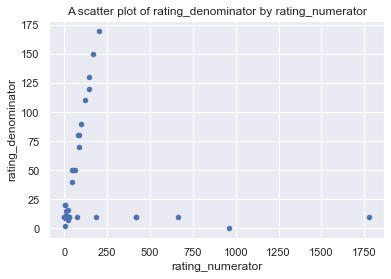

In [197]:
#scatter diagram for rating numerator and rating denominator 
we_rate_dogs_merged.plot(x='rating_numerator',y='rating_denominator',kind='scatter');
plt.title('A scatter plot of rating_denominator by rating_numerator');

exploring with visuals to see if there is an outlier for rating numerator column and rating denominator column, 
in addition this is a scatter plot that helped show relationship between 2 variables , and from the viz we can depict that 
there was somewhat a user who filled a very extra ordinary rating for numerator, also for many denominator ratings.
Also, observe how a lot of ratings are saturated within the 0-25 mark

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


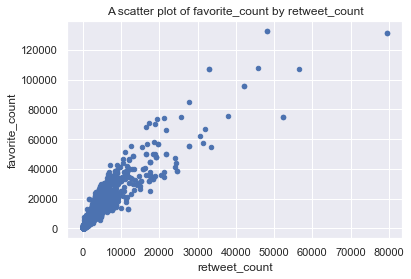

In [198]:
#scatter diagram for retweet count and favorite count
we_rate_dogs_merged.plot(x='retweet_count',y='favorite_count',kind='scatter');
plt.title('A scatter plot of favorite_count by retweet_count');

This viz helps buttress the fact that for most tweets that was liked by a User, that tweet was likely also retweeted, hence
seeing the slightly positive correlation of both variables.

# Drawing Conclusions

Lets address some questions on our Dataset, also create some insight.

##### View the next 3 viz to have insight for the most occured dog breed on our Twitter data

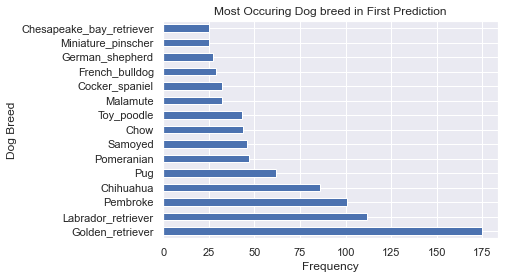

In [199]:

we_rate_dogs_merged['first_prediction_dog_breed'].value_counts()[:15].plot(kind='barh')
plt.title('Most Occuring Dog breed in First Prediction')
plt.ylabel('Dog Breed')
plt.xlabel('Frequency');

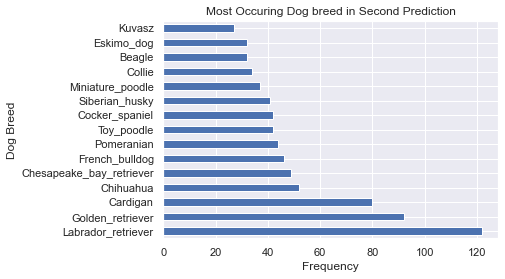

In [200]:
we_rate_dogs_merged['second_prediction_dog_breed'].value_counts()[:15].plot(kind='barh')
plt.title('Most Occuring Dog breed in Second Prediction')
plt.ylabel('Dog Breed')
plt.xlabel('Frequency');

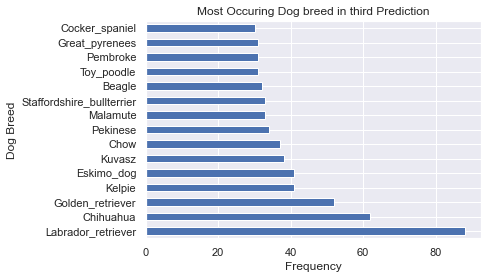

In [201]:
we_rate_dogs_merged['third_prediction_dog_breed'].value_counts()[:15].plot(kind='barh')
plt.title('Most Occuring Dog breed in third Prediction')
plt.ylabel('Dog Breed')
plt.xlabel('Frequency');

Using the we_rate_dogs_merged dataset,The Three charts displayed in quick succession shows that *Labrador retriever*
is the most commonly occurring dog breed based on this Twitter data followed closely by *Golden retriever* .

##### The favorite_count provides the number of times a tweet with a specific dog stage has been liked

In [202]:
we_rate_dogs_merged.nunique()

tweet_ID                              2175
timestamp                             2175
source                                   4
text                                  2175
expanded_urls                         2116
rating_numerator                        40
rating_denominator                      18
dog_name                               931
retweet_count                         1713
favorite_count                        2006
jpg_url                               1994
img_num                                  4
first_prediction_dog_breed             374
first_prediction_confidence_level     1991
first_prediction_dog_match               2
second_prediction_dog_breed            400
second_prediction_confidence_level    1989
second_prediction_dog_match              2
third_prediction_dog_breed             405
third_prediction_confidence_level     1991
third_prediction_dog_match               2
dog_stages                               5
dtype: int64

In [203]:
df_fc = we_rate_dogs_merged.nlargest(10, columns= ['favorite_count'])

using nlargest function to get the top 10 highest count of all rows based on 
favorite count column with different tweet_IDs

In [205]:
# selecting our column to plot
df_fc.iloc[: , np.r_[0,9,21]]

,tweet_ID,favorite_count,dog_stages
413,822872901745569793,132810.0,None
7481,822872901745569793,132810.0,puppo
1039,744234799360020481,131075.0,doggo
3395,744234799360020481,131075.0,None
66,879415818425184262,107956.0,None
534,807106840509214720,107015.0,None
135,866450705531457537,106827.0,None
4847,866450705531457537,106827.0,pupper
449,819004803107983360,95450.0,doggo
2805,819004803107983360,95450.0,None


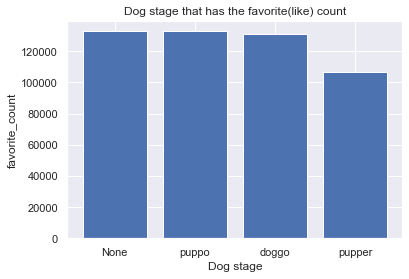

In [206]:
plt.bar([1, 2, 3, 4],[132810,132810,131075,106827])
plt.xticks([1, 2, 3, 4],['None','puppo','doggo','pupper']);
plt.title('Dog stage that has the favorite(like) count');
plt.ylabel('favorite_count')
plt.xlabel('Dog stage')
plt.show()

The viz above shows the Dog stage-Puppo (dog equivalent of a teenagger) was liked by alot of user, with tweet_ID 822872901745569793. So another tweet might have the same dog_stage but might not have the highest amount of likes
compared to the tweet_ID 822872901745569793.

###### *notice how tweet_ID 744234799360020481 in the viz and df_fc dataframe above came second with 131075 count*
###### *for doggo dog stage.*
###### *This gave another insight  to comparing the retweet count with various tweet_IDS*

In [207]:
df_rc = we_rate_dogs_merged.nlargest(10, columns= ['retweet_count'])

using nlargest function to get the top 10 highest count of all rows based on retweet count column with different tweet_IDs

In [208]:
# selecting our column to plot
df_rc.iloc[: , np.r_[0,8,21]]

,tweet_ID,retweet_count,dog_stages
1039,744234799360020481,79515.0,doggo
3395,744234799360020481,79515.0,None
534,807106840509214720,56625.0,None
1079,739238157791694849,52360.0,doggo
3435,739238157791694849,52360.0,None
413,822872901745569793,48265.0,None
7481,822872901745569793,48265.0,puppo
66,879415818425184262,45849.0,None
449,819004803107983360,42228.0,doggo
2805,819004803107983360,42228.0,None


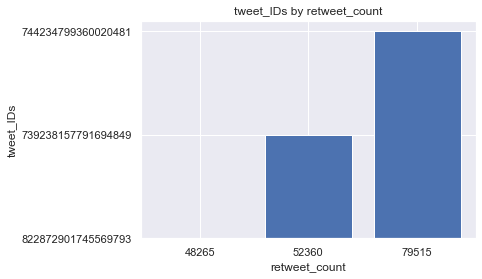

In [210]:
plt.bar([1,2,3,],['822872901745569793','739238157791694849','744234799360020481']);
plt.xticks([1,2,3,],[48265,52360,79515]);
plt.title('tweet_IDs by retweet_count');
plt.ylabel('tweet_IDs')
plt.xlabel('retweet_count')                        
plt.show()

tweet_ID *744234799360020481* has the highest retweet count and as explained in the favorite count viz section above,
this same tweet ID *744234799360020481*  has the dog stage doggo(a big pupper thats usually old) and also the second
highest favorite count.

This is safe to say that DOGGO has a lot of like and retweet when this particular tweet with ID *744234799360020481* was
tweeted as compared to other tweets in dataframe_retweet_count (df_rc) and dataframe_favorite_count(df_fc)

###### Tweet source provides information about the Tweet and its author.

In [211]:
#getting the source column and convert to dataframe df_s, on its own so we can plot our viz
df_se = we_rate_dogs_merged['source'].value_counts()
df_s = df_se.to_frame()
df_s

,source
Twitter for iPhone,2367
Vine - Make a Scene,118
Twitter Web Client,33
TweetDeck,13


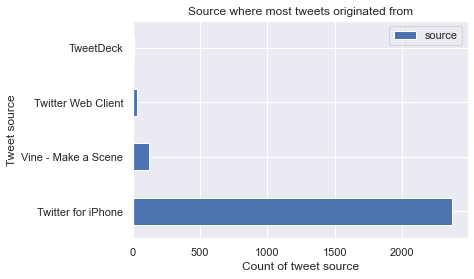

In [212]:
#viz below shows us the tweet_source with the highest number of tweets 
df1 = df_s.nlargest(4,columns = ['source'])
df1.plot(kind ='barh')
plt.title('Source where most tweets originated from')
plt.ylabel('Tweet source')
plt.xlabel('Count of tweet source')
plt.show()

The Figure above simply makes a graph of topmost source we had alot of tweets from in our Weratedogs site and dataset.
And we can see that "Twitter for Iphone" topped with a landlside amount.Comapared to users who uses the web-"Twitter Web Client", Our users are majorly IPHONE users.

# Conclusion

From the first 3 consecutive visualization in respect to the image_predictions_clean dataset,
The Three charts displayed in quick succession shows that Labrador retriever is one of the most commonly occurring 
dog breed based on this Twitter data followed closely by Golden retriever. As seen also in the
mean of 66% on the First prediction,down to 14% on the Second prediction for the Labrador retriever dog breed
compared to the mean of 72% on the First prediction,down to 11% on the Second prediction for the Golden_retriever.So close!!!




The favorite count, retweet count and tweet_IDs gave us more insight that there are tweets that have more favorite
counts and retweet counts than other tweet_IDs regardless if the dog stage posted with the various tweets are the same.like 
in our vizzes of favorite column and retweet counts compared with tweet_IDs, observe that the highest liked(favorite)
dog stage,*puppo* had a different tweet_ID and was not the highest_retweeted dog_stage; instead it was the 
tweet_ID *744234799360020481* with dog stage,*doggo* that had the most retweet count aand also the second highest favorite 
count.



As mentioned earlier,Tweet source provides information about the Tweet and its author.Hence why we needed to know where
most tweets on the weratedogs twitter archive come from. It helps understand how a tweet was posted.Twitter for iphone
is really a source where most authors posted from,liked and retweeted from. Safe to say our Users are majorly IPHONE users.

# Limitation

The missing values in most of the columns tried to hinder my analysis for the favorite count,
tweet_IDs by retweet count viz. as i had to fill the empty and missing rows with 
"np.nan".

Also the outlier for rating numerator,the gap from 75percentile of rating numerator to the max, 
same for rating denominator; this might be due to not being sure if this was an error 
from user or what exact number to include.This might have some effect on the dataset and make 
our findings somewhat not accurate.


LIST OF WEBSITES - www.stackoverflow.com , www.google.com


## WRANGLING EFFORTS
Data Wrangling process used in my analysis includes the

* Gathering
* Assess
* Clean


### *Gathering*

The first step as mentioned above is the GATHERING stage where i got to assemble all the data i needed for this project, First of all the The WeRateDogs Twitter archive was gathered by Downloading manually. Once it was downloaded, i uploaded it and read the data into a pandas DataFrame in the wrangle_act jupyter notebook.

Secondly,The tweet image predictions file (image_predictions.tsv) i got was also provided via a link on Udacity's classroom and was downloaded programmatically using the Requests library and the URL below: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv.

I had to access the Weratedogs twitter page with twitter Api(tweepy) to gather other information like retweet count and favorite count missing in the original Weratedogs twitter archive downloaded manually initially, after Twitter granted me elevated access.I read the Json objects from the tweet-json.txt file into pandas and all the json objects were pushed in a list of dictionaries which was appended and that list converted to a Dataframe.

At this time, i had my 3 datasets gathered and ready.

### *Assess*
This was where i made an effort to be somewhat like an investigator, searching for where the data had issues and what exact kind of issues it has.I had to read the image_predictions.tsv file here so i can assess the datasets as well. pandas function like .tail(), .describe(), .value_counts(), .info() helped me find out various issues with the gathered data i had .

I broke down the assessed problems gotten from Assessing the datasets into Quality issues and Tidyness issues which are listed below

#### Quality

* tweet_id column name not consistent for the other tables
* all (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns) rows have values in the dataframe but   we dont want retweet info based on the fact that most users retweet their own tweets.
* name column in the we_rate_dogs table have some unusual names as a,not,one,his etc,and this non-dog names all comes in small   letters. also name as column title not descriptive enough.
* Erroneous datatypes (timestamp, retweeted_status_timestamp columns)
* retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id,in_reply_to_user_id,retweeted_status_timestamp columns * * are not needed in this analysis for data integrity, esp with Validity data conerns with float datatype
* source column has some irrelevant words attached to the main source type
* header/column names for p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog are not descriptive enough
* p1,p2,p3 columns begin with small letters sometimes, capital letters other times

#### Tidiness

* df table and image_predictions table should be part of we_rate_dogs table
* Four columns containing one variable-dog stages


### *Clean*
In this section, First i created copy of all dataframes to enable me access the main dataframe/dataset should incase i want to in the future.All cleaning method or processes were carried out on this copied dataframes which were

* we_rate_dogs_clean
* image_predictions_clean
* df_clean

and all were made to pass through the "Define":"Code":"Test" formula for Cleaning data.

Cleaning steps i took for the assessed problems were that I

* Renamed the tweet_id column to tweet_ID column with pandas rename method so we can have a common column for easy joining of    tables later while cleaning
* Merged the df_table and the image_predictions table to the we_rate_dogs table using their common column tweet_ID
* Melted the doggo floofer pupper and puppo columns to dog stages.Drop the intermediate dogs column and also resulting    duplicate entries as a result of the melt method.
* selected the rows in these columns (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns) that   have null values,we only need purely dog ratings and null values for these columns signify no retweets from original user   tweets.
* Renamed the name column to a descriptive column name and convert all unusual names like 'a','not','one','his' etc to      nan(np.nan) values since those with lower case cant be a name of a dog and we cant input/fill any random name.
* Converted timestamp, retweeted_status_timestamp columns to datetime datatype.
* Dropped these            columns(retweeted_status_id,retweeted_status_user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_timestamp) and   also normal schema doesnt allow Unique IDs to be a float datatype.
* Got the exact description of the source by creating a function that will remove the unnneccessary details in the source *   column and return just the exact source type and then using .apply method to apply the function into the main dataframe
* Rename the p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog columns to a descriptive column name using .rename method in   pandas
* capitalize all first letters of the p1,p2,p3 columns to avoid inconsistency in those columns that might affect our analysis     later on. The .capitalize method in pandas was useful for this.